<a href="https://colab.research.google.com/github/marceloamesquita/brazilian_ecommerce_knn_python/blob/main/ecomm_sales_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
!pip install "dask[dataframe]"
import dask
import dask.dataframe as dd
from datetime import date,datetime,timedelta
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/análises/e-comm/olist_customers_dataset.csv')
df_order_payments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/análises/e-comm/olist_order_payments_dataset.csv')
df_orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/análises/e-comm/olist_orders_dataset.csv')
df_products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/análises/e-comm/olist_products_dataset.csv')
df_order_items = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/análises/e-comm/olist_order_items_dataset.csv')

In [ ]:
df_ecomm = dd.merge(df_customers, df_orders, how="left", on=["customer_id"]).merge(df_order_payments, how="left", on=["order_id"]).merge(df_order_items, how="left", on=["order_id"]).merge(df_products, how="left", on=["product_id"])
df_ecomm.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0


In [ ]:
del df_customers, df_orders, df_order_payments, df_products, df_order_items

In [ ]:
df_ecomm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118434 entries, 0 to 118433
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    118434 non-null  object 
 1   customer_unique_id             118434 non-null  object 
 2   customer_zip_code_prefix       118434 non-null  int64  
 3   customer_city                  118434 non-null  object 
 4   customer_state                 118434 non-null  object 
 5   order_id                       118434 non-null  object 
 6   order_status                   118434 non-null  object 
 7   order_purchase_timestamp       118434 non-null  object 
 8   order_approved_at              118258 non-null  object 
 9   order_delivered_carrier_date   116360 non-null  object 
 10  order_delivered_customer_date  115037 non-null  object 
 11  order_estimated_delivery_date  118434 non-null  object 
 12  payment_sequential            

In [ ]:
df_ecomm['order_purchase_timestamp'] = pd.to_datetime(df_ecomm['order_purchase_timestamp'])
df_ecomm['order_date'] = df_ecomm.order_purchase_timestamp.dt.date
df_ecomm['order_date'] = pd.to_datetime(df_ecomm['order_date'])

df_ecomm['year'] = df_ecomm['order_date'].dt.year
df_ecomm['month'] = df_ecomm['order_date'].dt.month 
df_ecomm['year_month'] = df_ecomm['order_date'].dt.strftime('%m/%Y')

print('Min Date:', df_ecomm['order_date'].min())
print('Max Date:', df_ecomm['order_date'].max())

Min Date: 2016-09-04 00:00:00
Max Date: 2018-10-17 00:00:00


In [ ]:
print(df_ecomm.iloc[230])

customer_id                      eee74b2a9aa0989243d2793c1a90fbf6
customer_unique_id               a40096fc0a3862e9e12bc55b5f8e6ab2
customer_zip_code_prefix                                    20561
customer_city                                      rio de janeiro
customer_state                                                 RJ
order_id                         d839ea07a528e914f89702508023da37
order_status                                            delivered
order_purchase_timestamp                      2017-10-11 14:49:49
order_approved_at                             2017-10-11 15:08:32
order_delivered_carrier_date                  2017-10-13 21:09:03
order_delivered_customer_date                 2017-10-17 21:56:01
order_estimated_delivery_date                 2017-11-03 00:00:00
payment_sequential                                            1.0
payment_type                                          credit_card
payment_installments                                          1.0
payment_va

In [ ]:
year = df_ecomm[['year','month','year_month','order_date', 'payment_value', 'order_id', 'customer_id', 'product_id']]
#year['year'] = year['order_date'].map(lambda x: x.year)

eda_year = year.groupby(['year','month']).agg({'payment_value': 'sum',
                                     'order_id': 'count',
                                     'customer_id': 'nunique',
                                     'product_id': 'count'}).reset_index()

eda_year['ticket_medio'] = round(eda_year['payment_value'] / eda_year['order_id'], 2)
eda_year['gasto_medio'] = round(eda_year['payment_value'] / eda_year['customer_id'], 2)
eda_year['frequencia'] = round(eda_year['order_id'] / eda_year['customer_id'], 2)
eda_year['itens_ticket'] = round(eda_year['product_id'] / eda_year['order_id'], 2)
eda_year['preco_medio'] = round(eda_year['ticket_medio'] / eda_year['itens_ticket'], 2)
eda_year['payment_value'] = round(eda_year['payment_value'],0)

eda_year.sort_values(by=['year','month'], inplace=True, ascending = False)
eda_year

,year,month,payment_value,order_id,customer_id,product_id,ticket_medio,gasto_medio,frequencia,itens_ticket,preco_medio
24,2018,10,590.0,4,4,0,147.42,147.42,1.00,0.00,inf
23,2018,9,4440.0,16,16,1,277.47,277.47,1.00,0.06,4624.50
22,2018,8,1248838.0,7522,6512,7462,166.02,191.77,1.16,0.99,167.70
21,2018,7,1359421.0,7351,6292,7331,184.93,216.06,1.17,1.00,184.93
20,2018,6,1298686.0,7397,6167,7390,175.57,210.59,1.20,1.00,175.57
19,2018,5,1511113.0,8248,6873,8221,183.21,219.86,1.20,1.00,183.21
18,2018,4,1497844.0,8266,6939,8261,181.21,215.86,1.19,1.00,181.21
17,2018,3,1480046.0,8567,7211,8544,172.76,205.25,1.19,1.00,172.76
16,2018,2,1311261.0,7956,6728,7922,164.81,194.90,1.18,1.00,164.81
15,2018,1,1415349.0,8597,7269,8545,164.63,194.71,1.18,0.99,166.29


In [ ]:
df_ecomm = df_ecomm[(df_ecomm['order_date'] > '2018-01-01') & (df_ecomm['customer_state'] == 'RS')]

In [ ]:
df_ecomm['recency'] = df_ecomm['order_date'].max() - df_ecomm['order_date']
df_ecomm['recency'] = df_ecomm['recency'].dt.days.astype('int16')

<ipython-input-255-e9edf610a914>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-255-e9edf610a914>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_ecomm_knn = df_ecomm.groupby('customer_unique_id').agg({'payment_value': 'sum',
                                                           'order_id': 'count',
                                                           'recency': 'min',
                                                           'product_id': 'count'}).reset_index()

df_ecomm_knn=df_ecomm_knn.rename(columns={'payment_value': 'sum_payment_value', 'order_id': 'count_order_id', 'recency': 'recency', 'product_id': 'product_qtd'})

df_ecomm_knn.head()                                                     

,customer_unique_id,sum_payment_value,count_order_id,recency,product_qtd
0,00196fdb2bf9edfc35e88ebfbcf8d781,27.00,1,187,1
1,001a3a8e11d76c9a366c31a4aa2cc529,24.23,1,99,1
2,00370dfde3d012c420d29657afc2fc8b,237.00,1,211,1
3,0050dcff37f8b9ff611d245e30572b46,68.22,1,118,1
4,0065f7795a38381973a373c8b4939679,31.22,1,52,1


In [ ]:
df_ecomm_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2710 entries, 0 to 2709
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  2710 non-null   object 
 1   sum_payment_value   2710 non-null   float64
 2   count_order_id      2710 non-null   int64  
 3   recency             2710 non-null   int16  
 4   product_qtd         2710 non-null   int64  
dtypes: float64(1), int16(1), int64(2), object(1)
memory usage: 90.1+ KB


In [ ]:
df_ecomm_knn = df_ecomm_knn[(df_ecomm_knn['sum_payment_value'] > 0) & (df_ecomm_knn['product_qtd'] > 0)]

In [ ]:
df_ecomm_knn.describe()

,sum_payment_value,count_order_id,recency,product_qtd
count,2703.000000,2703.000000,2703.000000,2703.000000
mean,220.107251,1.230855,124.879023,1.230115
std,631.330860,0.948712,67.916218,0.948502
min,20.700000,1.000000,0.000000,1.000000
25%,69.460000,1.000000,64.500000,1.000000
50%,118.480000,1.000000,130.000000,1.000000
75%,212.125000,1.000000,182.000000,1.000000
max,27935.460000,24.000000,238.000000,24.000000


Text(0, 0.5, 'count_order_id')

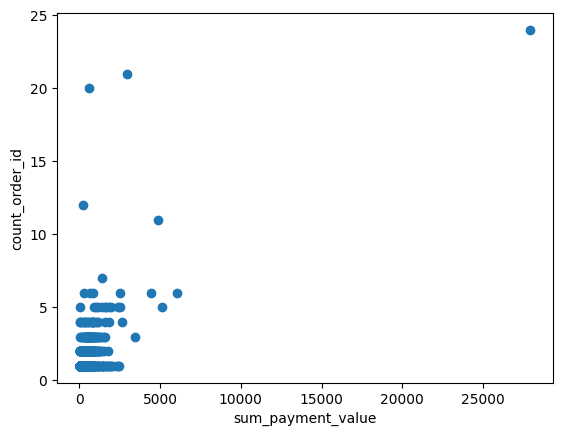

In [ ]:
plt.scatter(df_ecomm_knn["sum_payment_value"], 
            df_ecomm_knn["count_order_id"])

plt.xlabel("sum_payment_value")
plt.ylabel("count_order_id")

Text(0, 0.5, 'recency')

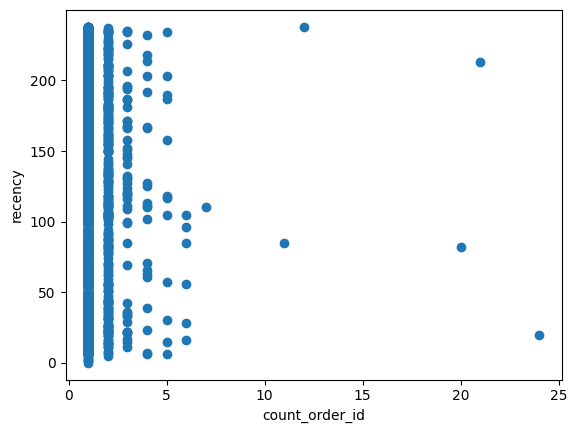

In [ ]:
plt.scatter(df_ecomm_knn["count_order_id"], 
            df_ecomm_knn["recency"])

plt.xlabel("count_order_id")
plt.ylabel("recency")

Text(0, 0.5, 'recency')

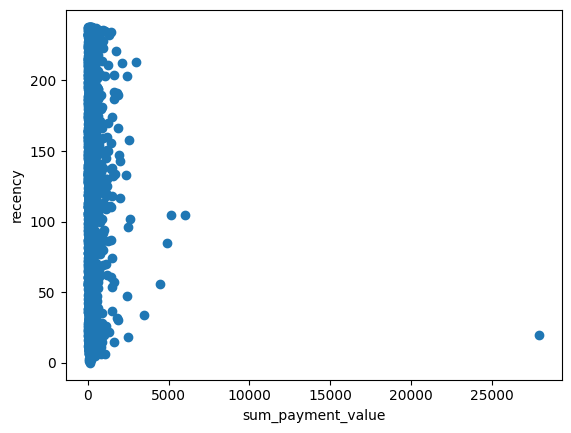

In [ ]:
plt.scatter(df_ecomm_knn["sum_payment_value"], 
            df_ecomm_knn["recency"])

plt.xlabel("sum_payment_value")
plt.ylabel("recency")

In [ ]:
# Remoção outliers à direita - frequencia e valor

media_valor = np.mean(df_ecomm_knn['sum_payment_value'])
std_valor = np.std(df_ecomm_knn['sum_payment_value'])
media_frequencia = np.mean(df_ecomm_knn['count_order_id'])
std_frequencia = np.std(df_ecomm_knn['count_order_id'])

valor_max = media_valor + 2 * std_valor
frequencia_max = media_frequencia + 2 * std_frequencia

print('Clients before outliers removal: ', df_ecomm_knn['customer_unique_id'].nunique())
rfm = df_ecomm_knn[(df_ecomm_knn['sum_payment_value'] < valor_max) & (df_ecomm_knn['count_order_id'] < frequencia_max)]

outliers = df_ecomm_knn[(df_ecomm_knn['sum_payment_value'] > valor_max) & (df_ecomm_knn['count_order_id'] > frequencia_max)]
print('Outliers: ', outliers['customer_unique_id'].nunique())

rfm=rfm[['sum_payment_value','count_order_id', 'recency', 'product_qtd']] 

rfm['sum_payment_value'] = round(rfm['sum_payment_value'],0)

rfm.columns = ['value','frequency', 'recency', 'quantity']

rfm.head()

Clients before outliers removal:  2703
Outliers:  16


,value,frequency,recency,quantity
0,27.0,1,187,1
1,24.0,1,99,1
2,237.0,1,211,1
3,68.0,1,118,1
4,31.0,1,52,1


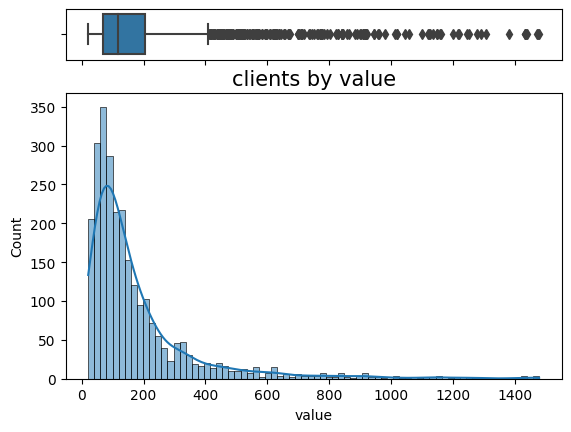

In [ ]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# assigning a graph to each ax

sns.boxplot(x=rfm["value"], ax=ax_box)
sns.histplot(data=rfm, x="value", ax=ax_hist,kde=True)
plt.title('clients by value',fontsize=15)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

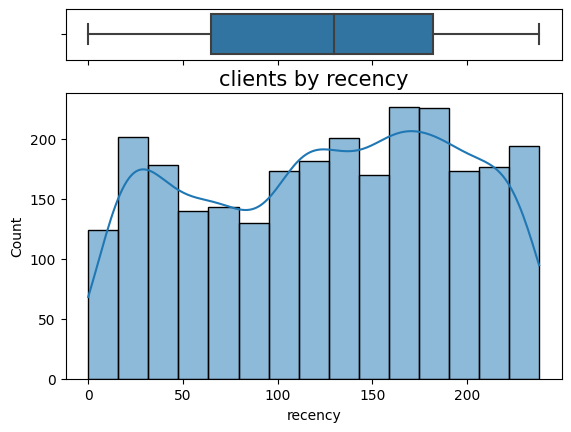

In [ ]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# assigning a graph to each ax

sns.boxplot(x=rfm["recency"], ax=ax_box)
sns.histplot(data=rfm, x="recency", ax=ax_hist,kde=True)
plt.title('clients by recency',fontsize=15)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

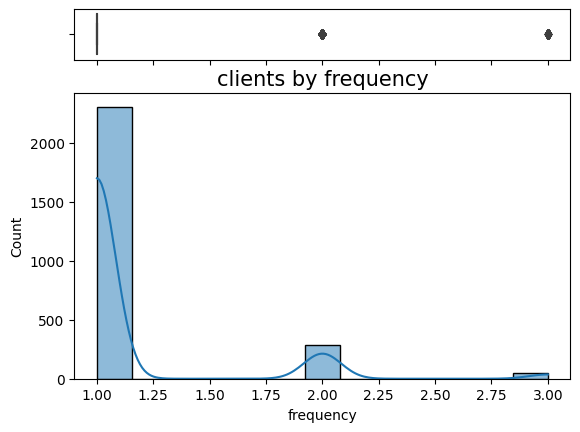

In [ ]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# assigning a graph to each ax

sns.boxplot(x=rfm["frequency"], ax=ax_box)
sns.histplot(data=rfm, x="frequency", ax=ax_hist,kde=True)
plt.title('clients by frequency',fontsize=15)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

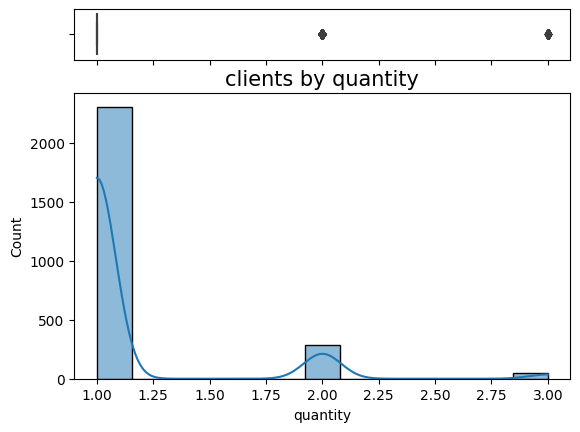

In [ ]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
# assigning a graph to each ax

sns.boxplot(x=rfm["quantity"], ax=ax_box)
sns.histplot(data=rfm, x="quantity", ax=ax_hist,kde=True)
plt.title('clients by quantity',fontsize=15)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

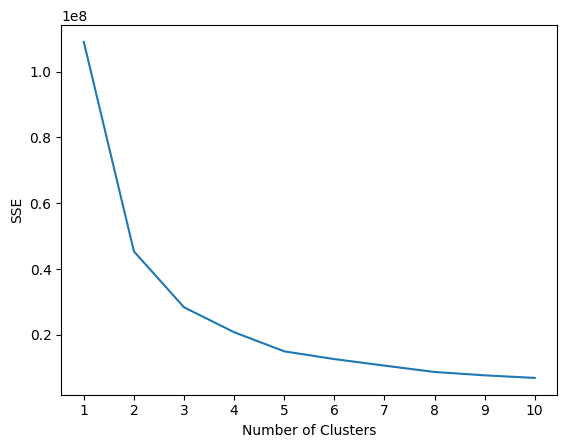

In [ ]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(rfm)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

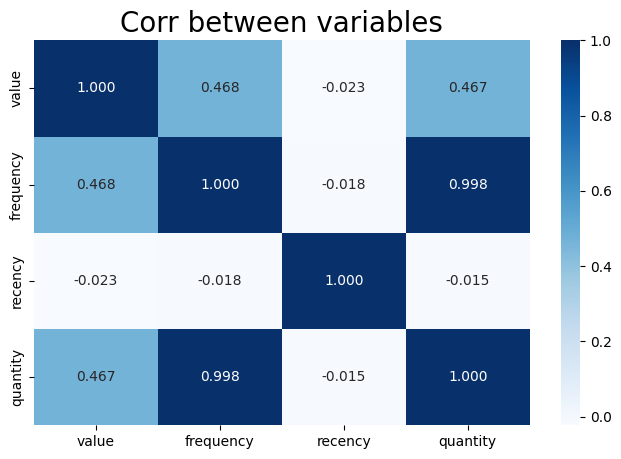

In [ ]:
plt.figure(figsize = (8,5))

sns.heatmap(rfm.corr(),
            annot = True,
            fmt = '.3f',
            cmap='Blues')
plt.title('Corr between variables', fontsize = 20)
plt.show()

In [ ]:
rfm = rfm[['value','recency','frequency']]
rfm.head()

,value,recency,frequency
0,27.0,187,1
1,24.0,99,1
2,237.0,211,1
3,68.0,118,1
4,31.0,52,1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



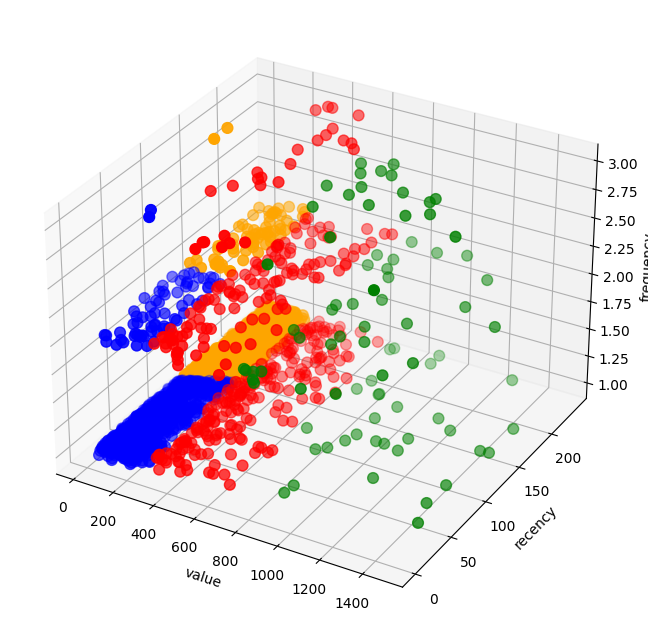

In [ ]:
kmeans = KMeans(n_clusters = 4).fit(rfm)
y_kmeans = kmeans.predict(rfm.iloc[:,0:])

rfm_kmeans = rfm
rfm_kmeans['label'] = y_kmeans

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm["value"][rfm.label == 0], rfm["recency"][rfm.label == 0], rfm["frequency"][rfm.label == 0], c='blue', s=60)
ax.scatter(rfm["value"][rfm.label == 1], rfm["recency"][rfm.label == 1], rfm["frequency"][rfm.label == 1], c='red', s=60)
ax.scatter(rfm["value"][rfm.label == 2], rfm["recency"][rfm.label == 2], rfm["frequency"][rfm.label == 2], c='green', s=60)
ax.scatter(rfm["value"][rfm.label == 3], rfm["recency"][rfm.label == 3], rfm["frequency"][rfm.label == 3], c='orange', s=60)
plt.xlabel("value")
plt.ylabel('recency')
ax.set_zlabel('frequency')
plt.show()

In [ ]:
final = rfm_kmeans.groupby('label').agg({ 'value': 'mean',
                                          'recency': 'mean',
                                          'frequency': 'mean'
                                         }).reset_index()

final.columns = ['label','value_mean', 'recency_mean','frequency_mean']

final.T

,0,1,2,3
label,0.000000,1.000000,2.000000,3.000000
value_mean,114.973737,398.204188,972.341463,103.857504
recency_mean,61.026263,123.259162,124.841463,179.511804
frequency_mean,1.069697,1.465969,1.853659,1.058179


<Axes: xlabel='label', ylabel='value'>

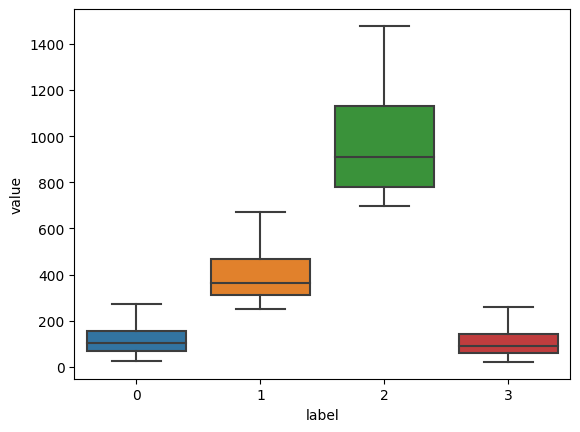

In [277]:
sns.boxplot(data=rfm_kmeans, y= 'value', x= 'label')

<Axes: xlabel='label', ylabel='recency'>

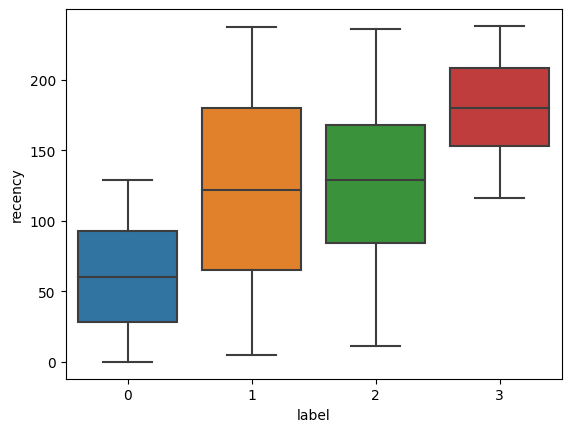

In [278]:
sns.boxplot(data=rfm_kmeans, y= 'recency', x= 'label')

<Axes: xlabel='label', ylabel='frequency'>

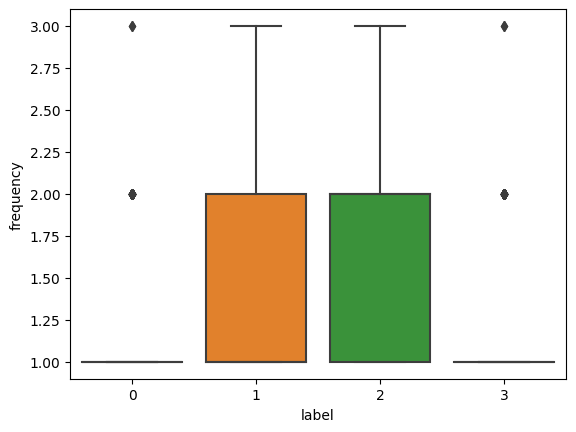

In [279]:
sns.boxplot(data=rfm_kmeans, y= 'frequency', x= 'label')